In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [635]:
df = pd.read_csv('datasets/diabetes.csv')

In [636]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [637]:
# mapping True to 1 and False to 0 (just for testing!!)
my_mp = {1: True, 0: False}
df['Outcome'] = df['Outcome'].map(my_mp)

In [638]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [639]:
# change it back to 0 and 1
my_mp = {True: 1, False: 0}
df['Outcome'] = df['Outcome'].map(my_mp)

In [640]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [641]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [642]:
# we still might have hidden missing values for numeric values 0 - we will check this later
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [643]:
# if there is any 100% correlation between two vaeriables, we should delete one of them!
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [644]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [645]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [646]:
num_true_cases = len(df[df.Outcome == 1])
num_false_cases = len(df[df.Outcome == 0])

print('Number of True cases:',num_true_cases,'-', np.round(num_true_cases / df.shape[0]  * 100,2),'%')
print('Number of False cases:', num_false_cases,'-',np.round(num_false_cases / df.shape[0] * 100,2),'%')

Number of True cases: 268 - 34.9 %
Number of False cases: 500 - 65.1 %


In [647]:
# to find out the hidden missing values
print('Pregnancies has', len(df[df.Pregnancies == 0]), 'Zero values')
print('Glucose has', len(df[df.Glucose == 0]), 'Zero values')
print('BloodPressure has', len(df[df.BloodPressure == 0]), 'Zero values')
print('SkinThickness has', len(df[df.SkinThickness == 0]), 'Zero values')
print('Insulin has', len(df[df.Insulin == 0]), 'Zero values')
print('BMI has', len(df[df.BMI == 0]), 'Zero values')
print('DiabetesPedigreeFunction has', len(df[df.DiabetesPedigreeFunction == 0]), 'Zero values')
print('Age has', len(df[df.Age == 0]), 'Zero values')

Pregnancies has 111 Zero values
Glucose has 5 Zero values
BloodPressure has 35 Zero values
SkinThickness has 227 Zero values
Insulin has 374 Zero values
BMI has 11 Zero values
DiabetesPedigreeFunction has 0 Zero values
Age has 0 Zero values


In [648]:
from sklearn.model_selection import train_test_split

feature_cols = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

X = df[feature_cols]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [649]:
# to deal with the hidden missing values we can impute those values with the mean value
# since the number of missing values are high we should not drop them
from sklearn.preprocessing import Imputer
fill_0 = Imputer(missing_values=0, strategy='mean', axis=0)
X_train = pd.DataFrame(fill_0.fit_transform(X_train))
X_test = pd.DataFrame(fill_0.fit_transform(X_test))

/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [650]:
print('train %:')
print(np.round(len(X_train) / len(X),2))
print(np.round(len(X_test) / len(X),2))
print('-----')
print('test %:')
print(np.round(len(y_train) / len(X),2))
print(np.round(len(y_test) / len(X),2))

train %:
0.7
0.3
-----
test %:
0.7
0.3


In [651]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# class_weight='balanced' to balance the classes which we have 0 and 1 in the outcome column
model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42, class_weight='balanced')
model = model.fit(X_train, y_train)

In [652]:
# Accuracy of train data
y_pred_train = model.predict(X_train)
print("Accuracy Train Data:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy Train Data: 0.8547486033519553


In [653]:
# Accuracy of test data
y_pred_test = model.predict(X_test)
print("Accuracy Test Data:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy Test Data: 0.7316017316017316


In [654]:
# Train data
print('Confusion matrix: \n', metrics.confusion_matrix(y_train, y_pred_train))
print('')
print('Classifiaction report: \n', metrics.classification_report(y_train, y_pred_train))

Confusion matrix: 
 [[284  65]
 [ 13 175]]

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       349
           1       0.73      0.93      0.82       188

   micro avg       0.85      0.85      0.85       537
   macro avg       0.84      0.87      0.85       537
weighted avg       0.88      0.85      0.86       537



In [655]:
# Test data
# recall is also known as TP.   
# recall = TP / (TP + FN)
# precision = TP / (TP + FP)
print('Confusion matrix: \n', metrics.confusion_matrix(y_test, y_pred_test))
print('')
print('Classifiaction report: \n', metrics.classification_report(y_test, y_pred_test))

Confusion matrix: 
 [[109  42]
 [ 20  60]]

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.84      0.72      0.78       151
           1       0.59      0.75      0.66        80

   micro avg       0.73      0.73      0.73       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.73      0.74       231



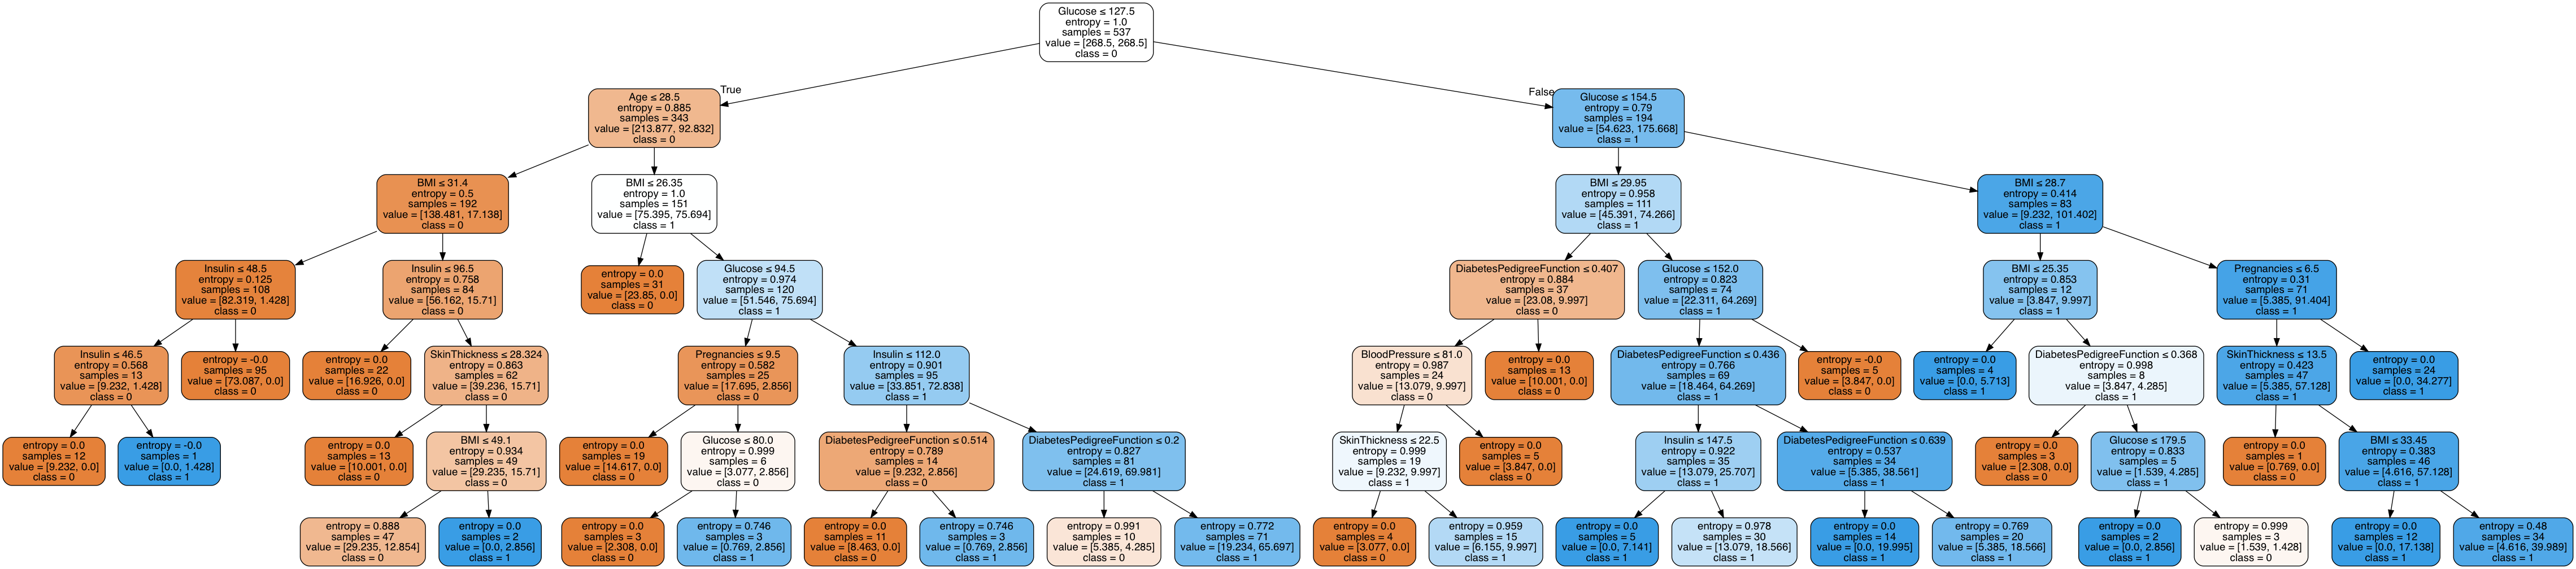

In [656]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [657]:
# now I am going to use Logistic RegressionCV to see if the accuracy increases
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(random_state=42, cv=5, Cs=3, max_iter=500, solver='lbfgs', class_weight='balanced')
lr = lr.fit(X_train, y_train.ravel())

In [658]:
# test data
y_pred_test = lr.predict(X_test)
print("Accuracy Test Data:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy Test Data: 0.7012987012987013


In [659]:
# train dara
y_pred_train = lr.predict(X_train)
print("Accuracy Train Data:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy Train Data: 0.7690875232774674
